# 📉📊📈**Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models**📉📊📈




The stock price forecast is one of the most preferred topics and most interesting topics in the science industry. However, stock market price forecasts are challenging compared to other price forecasting case studies. Many scholars and industry experts have come to a greater consensus a decade. They have studied stocks in various fields such as Computer Science, Economics, Business Arithmetic, and Marketing price forecasts. The stock has been identified according to them as a random walking behavior at market prices. The sudden rises and falls have been the main reason behind stock market price forecasting being a big challenge. An efficient and accurate. stock market forecasting model will help managers, investors, and decision-makers make the right decisions regarding their investments. Machine learning techniques used to predict stock prices include the analysis of historical data to predict the likelihood of a future event or to predict future performance. This is done by looking at patterns of data that include current and past information and finding the most suitable predictive models.

# ✅ **Decision Tree Regression** ✅

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

# **Import Libraries**

In [1]:
# yahoo_finance is used to fetch data 
! pip install yfinance

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load data into a Data Frame**

In [3]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,3.87,3.88,3.83,3.87,3.87,12347800
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100


# **Data Preprocessing**

In [4]:
# Create more data
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,-1)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)
dataset['Return'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
Date,,,,,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400,1,1,1,0.020672
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1,1,1,0.012658
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1,1,1,0.032500
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,0,1,-1,0.012106
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,0,-1,-1,0.000000


# **View Dataset**

In [5]:
#View Dataset
dataset

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
Date,,,,,,,,,,
2014-01-02,3.850000,3.98,3.840000,3.950000,3.950000,20548400,1,1,1,0.020672
2014-01-03,3.980000,4.00,3.880000,4.000000,4.000000,22887200,1,1,1,0.012658
2014-01-06,4.010000,4.18,3.990000,4.130000,4.130000,42398300,1,1,1,0.032500
2014-01-07,4.190000,4.25,4.110000,4.180000,4.180000,42932100,0,1,-1,0.012106
2014-01-08,4.230000,4.26,4.140000,4.180000,4.180000,30678700,0,-1,-1,0.000000
...,...,...,...,...,...,...,...,...,...,...
2018-08-20,19.790001,20.08,19.350000,19.980000,19.980000,62983200,0,1,1,0.010622
2018-08-21,19.980000,20.42,19.860001,20.400000,20.400000,55629000,1,1,1,0.021021
2018-08-22,20.280001,20.92,20.209999,20.900000,20.900000,62002700,1,1,1,0.024510


# **Null value testing and data clearance**

In [6]:
# See how many null values in each column

dataset.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Return               0
dtype: int64

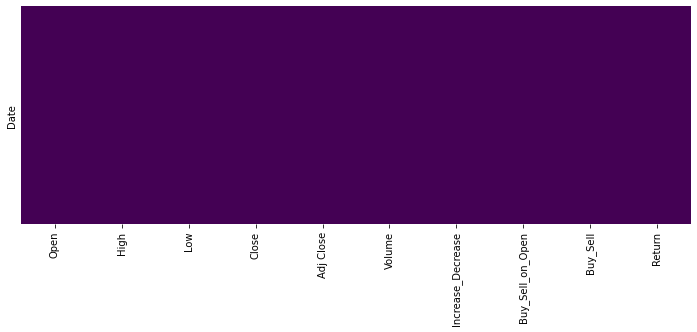

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Data**

In [8]:
# see number of rows, number of columns
dataset.shape

(1171, 10)

In [9]:
#TOTAL NUMBER OF RECORDS
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  11710


In [10]:
# see columns names

dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Return'],
      dtype='object')

In [11]:
# See data types of the Columns

dataset.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Increase_Decrease      int32
Buy_Sell_on_Open       int32
Buy_Sell               int32
Return               float64
dtype: object

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Increase_Decrease'}>,
        <AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>],
       [<AxesSubplot:title={'center':'Return'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

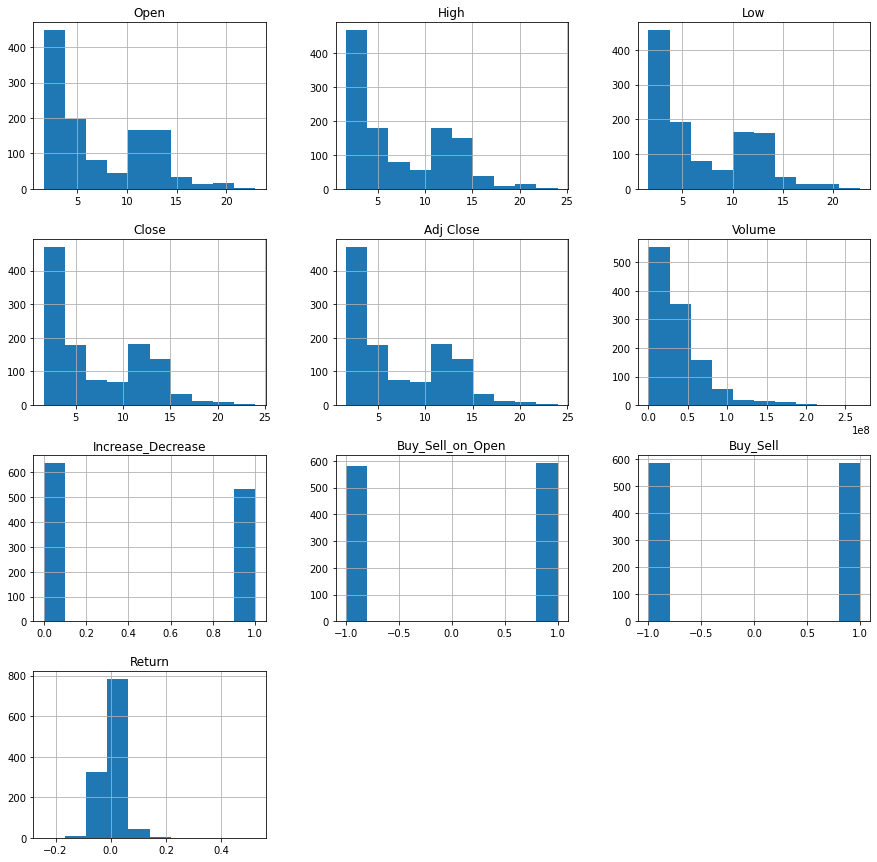

In [12]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [13]:
# The statistics per each column

dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Return
count,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1.171000e+03,1171.000000,1171.000000,1171.000000,1171.000000
mean,6.998651,7.143945,6.852844,7.000196,7.000196,3.761912e+07,0.455167,0.011102,-0.000854,0.002257
std,4.854418,4.952265,4.752834,4.860349,4.860349,3.354346e+07,0.498199,1.000366,1.000427,0.038101
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00,0.000000,-1.000000,-1.000000,-0.242291
25%,2.710000,2.780000,2.660000,2.705000,2.705000,1.308165e+07,0.000000,-1.000000,-1.000000,-0.015962
50%,4.250000,4.350000,4.170000,4.270000,4.270000,2.900080e+07,0.000000,1.000000,-1.000000,0.000706
75%,11.565000,11.770000,11.305000,11.550000,11.550000,5.057790e+07,1.000000,1.000000,1.000000,0.018312
max,22.910000,24.000000,22.670000,23.980000,23.980000,2.683365e+08,1.000000,1.000000,1.000000,0.522901


# **Define X and Y**

In [14]:
X = dataset.drop(['Adj Close', 'Close'], axis=1)  
y = dataset['Adj Close'] 

# **Split Train data and Test data**

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **Dataset Traning and Model Traning**

In [16]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

# **Comparison of Actual Values and Predictions Values**

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df.head())
print(df.tail())

            Actual  Predicted
Date                         
2017-08-08   13.11      13.30
2017-11-13   11.09      11.12
2016-05-17    3.79       3.78
2015-04-23    2.33       2.34
2015-09-10    1.84       1.88
            Actual  Predicted
Date                         
2014-03-10    3.81       3.81
2017-12-26   10.46      10.53
2016-05-10    3.64       3.60
2018-02-09   11.31      11.07
2016-06-03    4.16       4.12


In [19]:
print(y_test.shape)
print(y_pred.shape)

(235,)
(235,)


# **Accuracy and Loss Function Values of the Model**

In [20]:
from sklearn import metrics  
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))  
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 0.09323406219482422
Mean_Squared_Error(MSE): 0.023714486465526877
Root_Mean_Squared_Error(RMSE): 0.15399508584862984


In [21]:
from sklearn.model_selection import cross_val_score

dt_fit = regressor.fit(X_train, y_train)
dt_scores = cross_val_score(dt_fit, X_train, y_train, cv = 5)

In [22]:
print("Accuracy score: {:.7f}".format(regressor.score(X_test, y_test)))

Accuracy score: 0.9988046
